In [1]:
import json
from trashcan_core.components.constants.file_paths import MATERIAL_VERSION_PATH

# Load the COCO JSON file
def load_coco_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Example usage
file_path = MATERIAL_VERSION_PATH + "/instances_train_trashcan.json"
coco_data = load_coco_json(file_path)



In [6]:
import os

li = os.listdir(MATERIAL_VERSION_PATH+'/val')
print(len(li))

li = os.listdir(MATERIAL_VERSION_PATH+'/train')
print(len(li))

1808
6603


1808

In [2]:
anot_path = "../data/material_version/instances_train_trashcan.json"
img_path = "../data/material_version/train/vid_000298_frame0000019.jpg"

In [3]:
annots = coco_data["annotations"]
ims = coco_data["images"]

In [4]:
coco_data['categories']

[{'supercategory': 'rov', 'id': 1, 'name': 'rov'},
 {'supercategory': 'plant', 'id': 2, 'name': 'plant'},
 {'supercategory': 'animal_fish', 'id': 3, 'name': 'animal_fish'},
 {'supercategory': 'animal_starfish', 'id': 4, 'name': 'animal_starfish'},
 {'supercategory': 'animal_shells', 'id': 5, 'name': 'animal_shells'},
 {'supercategory': 'animal_crab', 'id': 6, 'name': 'animal_crab'},
 {'supercategory': 'animal_eel', 'id': 7, 'name': 'animal_eel'},
 {'supercategory': 'animal_etc', 'id': 8, 'name': 'animal_etc'},
 {'supercategory': 'trash_etc', 'id': 9, 'name': 'trash_etc'},
 {'supercategory': 'trash_fabric', 'id': 10, 'name': 'trash_fabric'},
 {'supercategory': 'trash_fishing_gear',
  'id': 11,
  'name': 'trash_fishing_gear'},
 {'supercategory': 'trash_metal', 'id': 12, 'name': 'trash_metal'},
 {'supercategory': 'trash_paper', 'id': 13, 'name': 'trash_paper'},
 {'supercategory': 'trash_plastic', 'id': 14, 'name': 'trash_plastic'},
 {'supercategory': 'trash_rubber', 'id': 15, 'name': 'tra

In [5]:
ims[annots[2]["image_id"]-1]

{'file_name': 'vid_000338_frame0000013.jpg',
 'height': 270,
 'width': 480,
 'id': 2}

In [4]:
annots_dict = {}

for annot in annots:
    im_name = ims[annot["image_id"] - 1]["file_name"]
    if im_name in annots_dict:
        annots_dict[im_name].append(
            {
                "label": coco_data['categories'][annot["category_id"]-1]['name'],
                "points": annot["segmentation"],
            }
        )
    else:
        annots_dict[im_name] = [
            {
                "label": coco_data['categories'][annot["category_id"]-1]['name'],
                "points": annot["segmentation"],
            }
        ]


In [7]:
annots_dict['vid_000298_frame0000019.jpg']

[{'label': 'trash_plastic',
  'points': [[229.0,
    204.98076923076923,
    218.0,
    204.9945054945055,
    207.00666666666666,
    198.0,
    202.00666666666666,
    188.0,
    202.03333333333333,
    180.0,
    205.0076923076923,
    173.0,
    212.0,
    166.0185185185185,
    237.0,
    155.1,
    251.0,
    154.003125,
    259.0,
    157.00666666666666,
    265.99367088607596,
    164.0,
    268.99545454545455,
    172.0,
    268.98148148148147,
    179.0,
    265.99645390070924,
    186.0,
    259.0,
    192.99736842105264,
    245.98888888888888,
    197.0,
    229.0,
    204.98076923076923]]},
 {'label': 'animal_fish',
  'points': [[86.0,
    110.98387096774194,
    77.0,
    109.99691358024691,
    72.00757575757575,
    106.0,
    70.00438596491227,
    101.0,
    71.0047619047619,
    95.0,
    78.0,
    89.00252525252525,
    82.0,
    89.00196078431372,
    94.0,
    84.01282051282051,
    101.0,
    84.0050505050505,
    105.0,
    86.00471698113208,
    109.9916666666

## Mask Generator

In [5]:
from trashcan_core.components.mask_generator import MaskGenerator

from PIL import Image
import matplotlib.pyplot as plt

In [7]:
ims_path = "../data/material_version/train"

mask_generator = MaskGenerator()


im_name = list(annots_dict.keys())[0]
im_path = ims_path + "/" + im_name
im_annots = annots_dict[im_name]
im = Image.open(im_path).convert("RGB")

k = mask_generator(im, im_annots)

In [10]:
print(k.shape)

torch.Size([17, 360, 480])


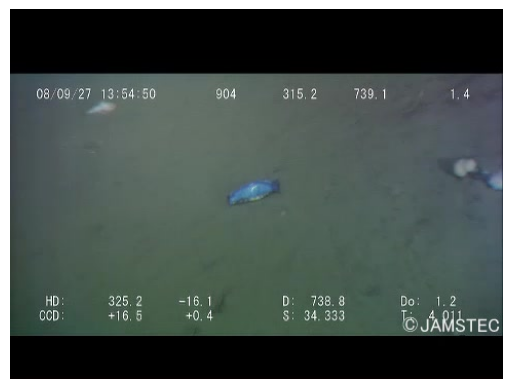

In [8]:
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

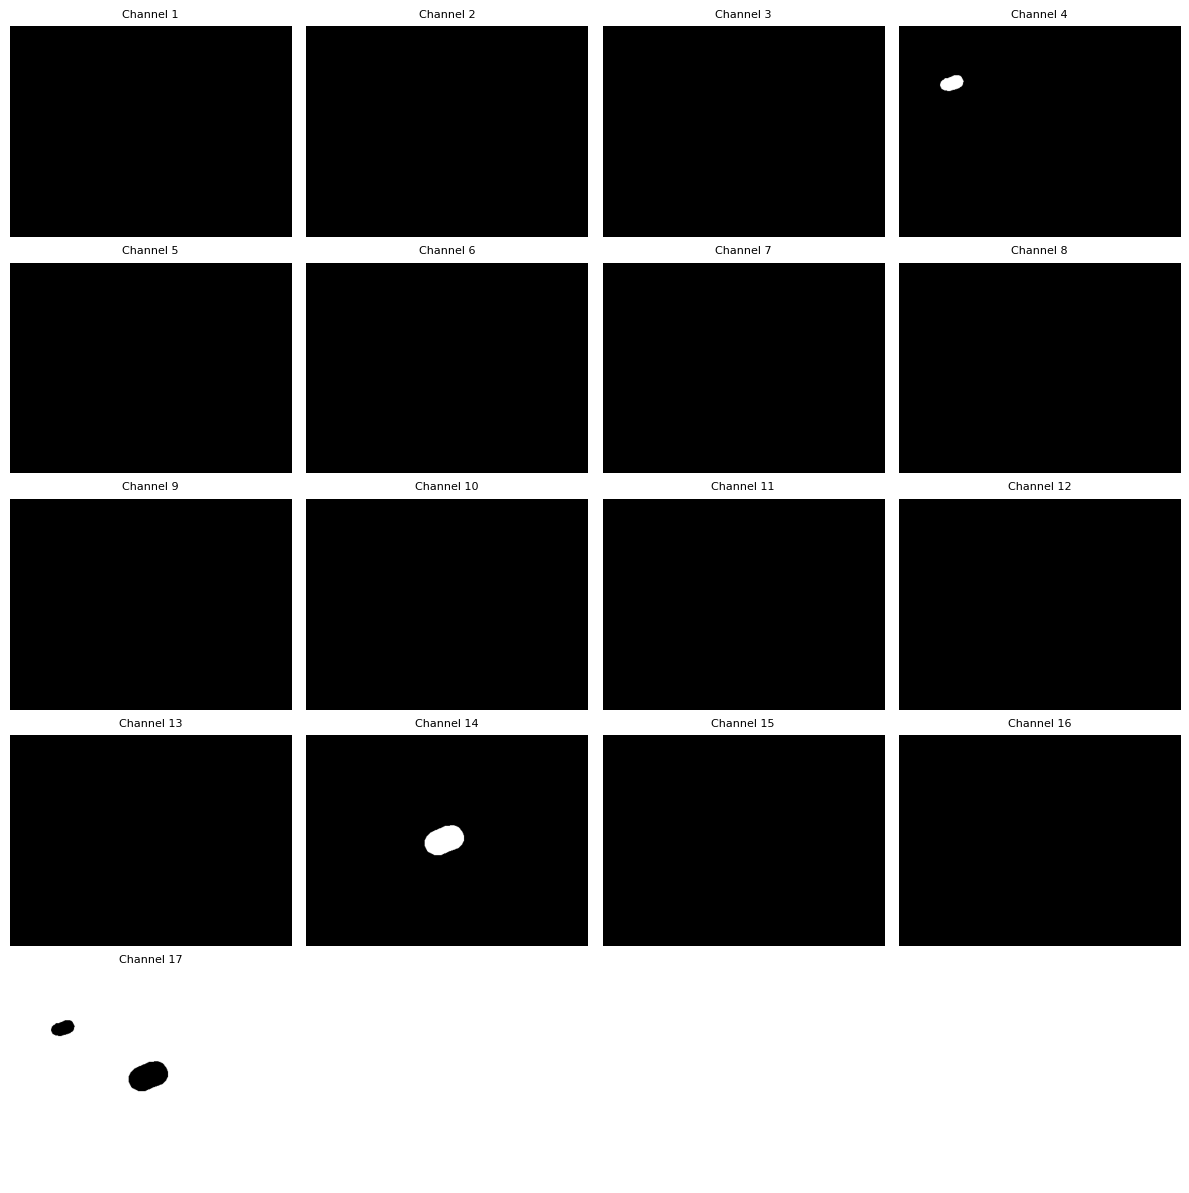

In [9]:
import matplotlib.pyplot as plt
import math

# Number of channels
num_channels = 17  

# Number of rows and columns for the grid
ncols = 4  # Number of columns (adjust as needed for layout)
nrows = math.ceil(num_channels / ncols)  # Compute the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

for i in range(num_channels):
    # Get the mask for the i-th channel
    mask = k[i].cpu().numpy()
    
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Channel {i+1}', fontsize=8)
    axes[i].axis('off')

for j in range(num_channels, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
print(k.shape[2])

480


## Data Loader

In [4]:
from trashcan_core.components.data_loader import DataLoader

In [5]:
data_loader = DataLoader(MATERIAL_VERSION_PATH)

In [6]:
data_loader()

In [25]:
print(data_loader.x_train[4].shape)

torch.Size([24, 3, 256, 480])


## Trainer

In [1]:
from monai.losses import DiceLoss
import torch.optim as optim

from trashcan_core.components.data_loader import DataLoader
from trashcan_core.components.constants import MATERIAL_VERSION_PATH
from trashcan.components.models import ResUNetMini

In [2]:
data_loader = DataLoader(MATERIAL_VERSION_PATH)

In [3]:
model = ResUNetMini()

In [4]:
loss = DiceLoss()  

optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

trainer = model.as_trainer(loss=loss, optimizer=optimizer, data_loader=data_loader)

In [5]:
trainer.crop(height=128, width=128)

Cropped all dataset images to size (128, 128).


In [6]:
x_train, y_train, x_val, y_val = trainer.get_data()

In [8]:
print("Shape of first x_train image:", x_train[0].shape) 
print("Shape of first y_train label:", y_train[0].shape)  

Shape of first x_train image: torch.Size([32, 3, 128, 128])
Shape of first y_train label: torch.Size([32, 17, 128, 128])


In [30]:
trainer(20)

Epoch [1/20], Loss: 0.05238087132652813
Validation Loss: 0.005224272847813081, Accuracy: 30737.5%
Epoch [2/20], Loss: 0.05236117852562889
Validation Loss: 0.005223082667366068, Accuracy: 31846.875%
Epoch [3/20], Loss: 0.05234174868639778
Validation Loss: 0.005221900455454454, Accuracy: 33125.0%
Epoch [4/20], Loss: 0.05232227517959268
Validation Loss: 0.005220735455579299, Accuracy: 34646.875%
Epoch [5/20], Loss: 0.05230113051154397
Validation Loss: 0.005219580974170869, Accuracy: 36328.125%
Epoch [6/20], Loss: 0.05227762524456901
Validation Loss: 0.0052184363737463315, Accuracy: 38143.75%
Epoch [7/20], Loss: 0.05224513975694218
Validation Loss: 0.005217297510667281, Accuracy: 39931.25%
Epoch [8/20], Loss: 0.05233235059574964
Validation Loss: 0.005216062068939209, Accuracy: 41887.5%
Epoch [9/20], Loss: 0.0522238236060117
Validation Loss: 0.005214927030757149, Accuracy: 44071.875%
Epoch [10/20], Loss: 0.05219385745053623
Validation Loss: 0.005213927457676851, Accuracy: 46128.125%
Epoch [

## Results

In [8]:
import torch
import matplotlib.pyplot as plt

from trashcan_core.components.plotter import Plotter

In [9]:
plotter = Plotter()

In [10]:
batch_res = trainer.net(trainer.get_data()[2][0])
_, predicted = torch.max(batch_res, 1)

In [11]:
predicted.shape

torch.Size([32, 128, 128])

In [31]:
im_segmentation = predicted[0] 
plotter.plot_segmentation(im_segmentation)

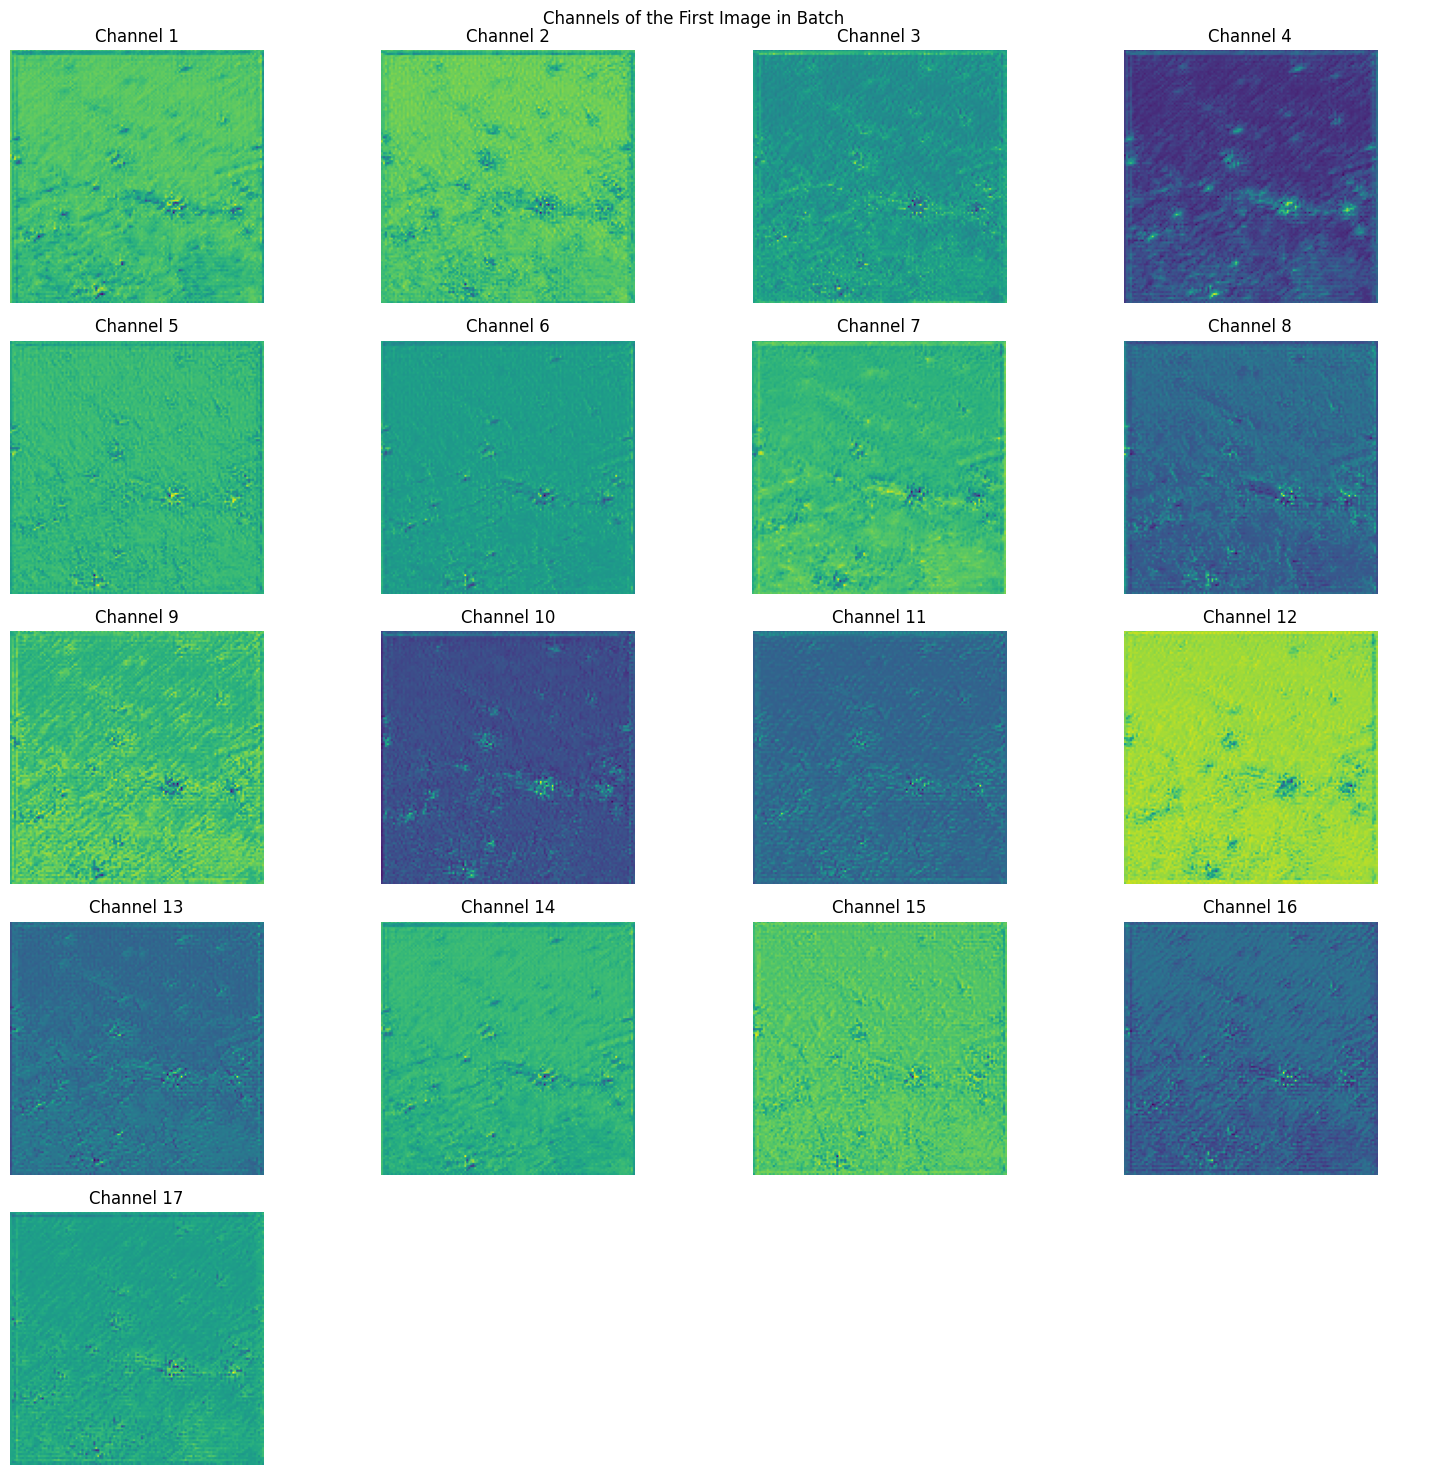

In [13]:
im = batch_res[0]

im_np = im.detach().cpu().numpy()  

n_channels = im_np.shape[0]
n_cols = 4
n_rows = (n_channels + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.suptitle("Channels of the First Image in Batch")

for i in range(n_channels):
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    ax.imshow(im_np[i], cmap="viridis")
    ax.set_title(f"Channel {i+1}")
    ax.axis("off")

for j in range(i + 1, n_rows * n_cols):
    row, col = divmod(j, n_cols)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()


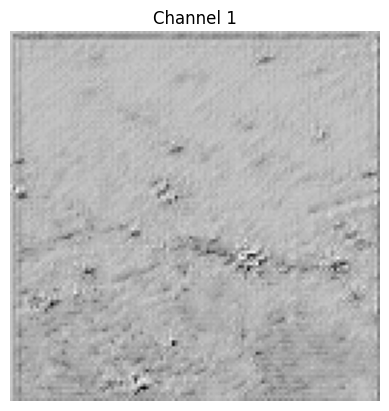

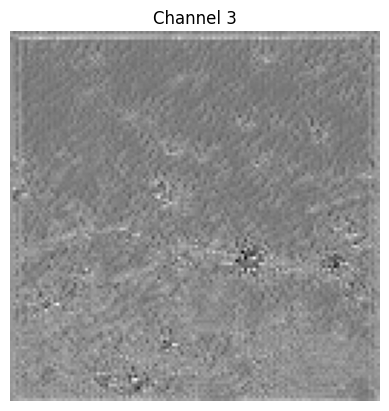

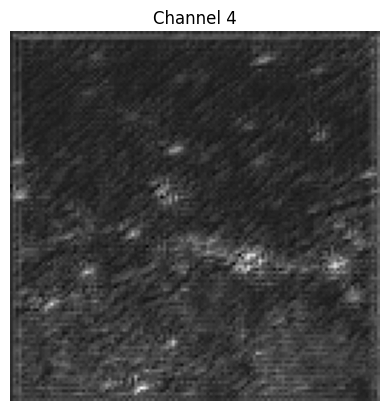

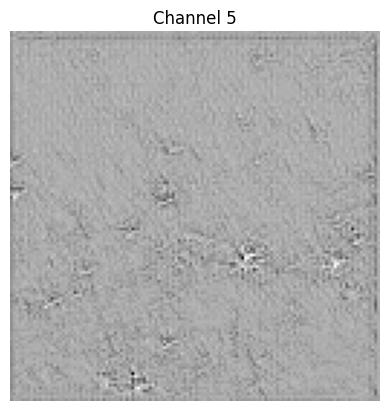

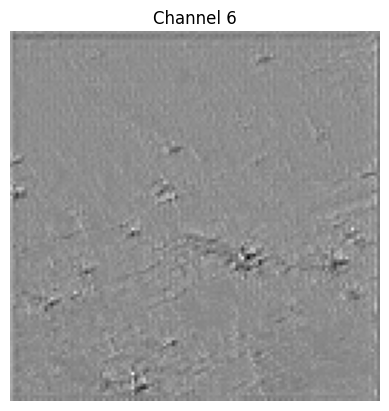

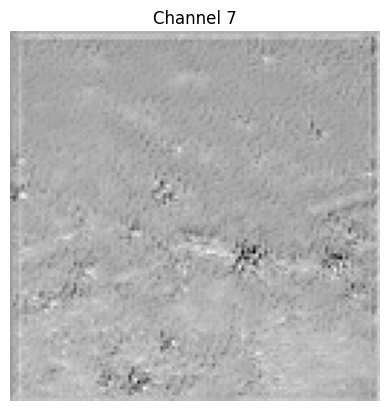

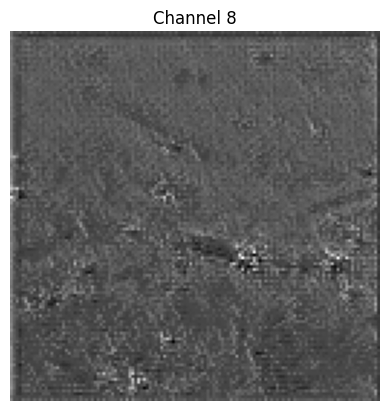

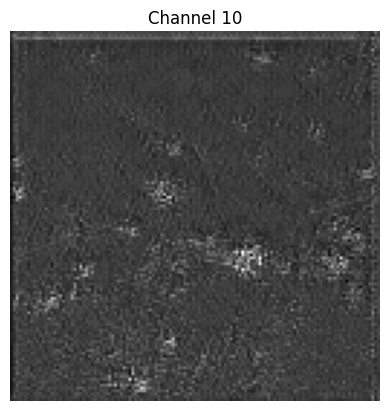

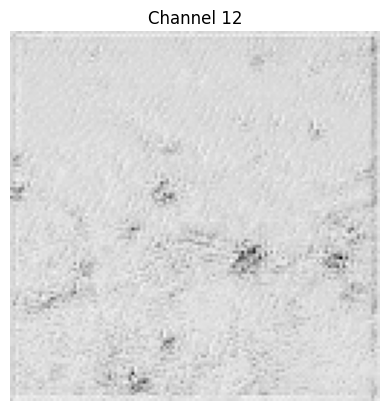

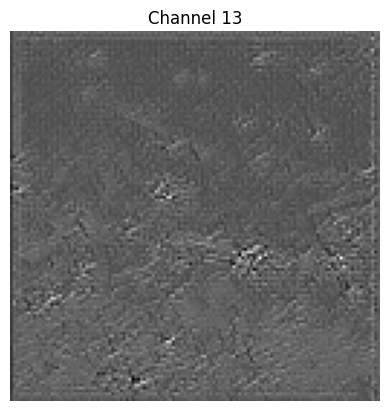

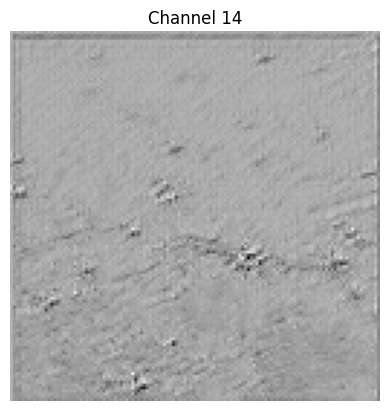

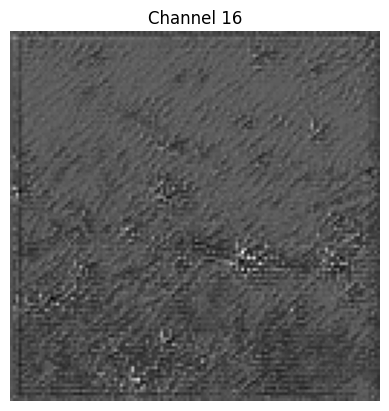

In [20]:
for i in range(im.shape[0]):  
    mask = im[i].detach().cpu().numpy()  
    plt.imshow(mask, cmap='gray')
    plt.title(f'Channel {i+1}')
    plt.axis('off')
    plt.show()

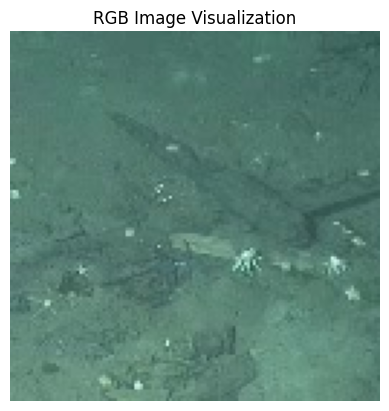

In [ ]:
import matplotlib.pyplot as plt
import torch

def visualize_rgb_image(image_tensor):
    image_np = image_tensor.detach().cpu().numpy()

    image_np = image_np.transpose(1, 2, 0)

    if image_np.max() > 1.0:
        image_np = image_np / 255.0

    plt.imshow(image_np)
    plt.axis('off')
    plt.title("RGB Image Visualization")
    plt.show()

visualize_rgb_image(trainer.get_data()[2][0][0])


In [28]:
k = trainer.get_data()[3][0][0]

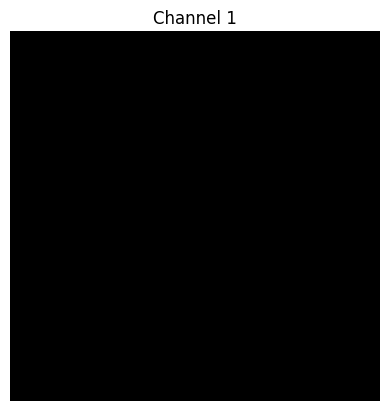

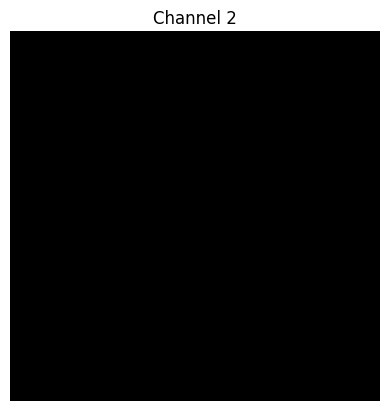

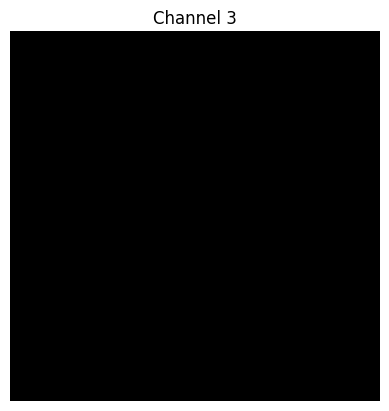

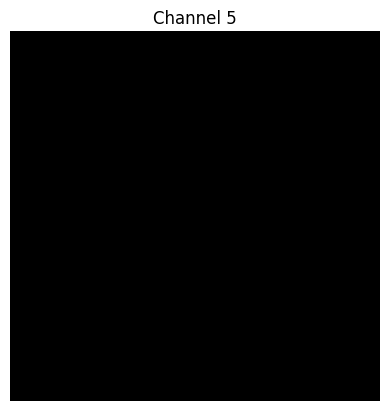

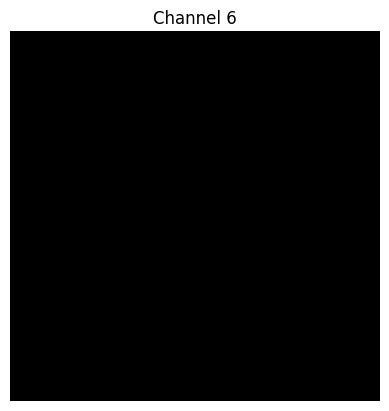

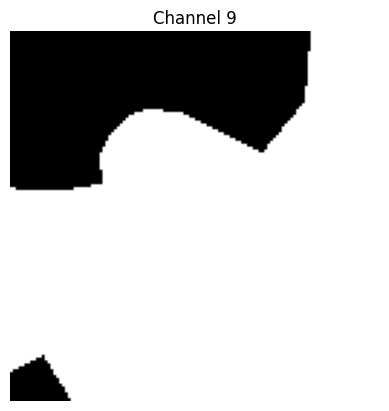

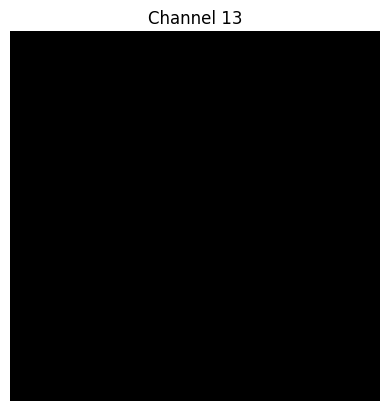

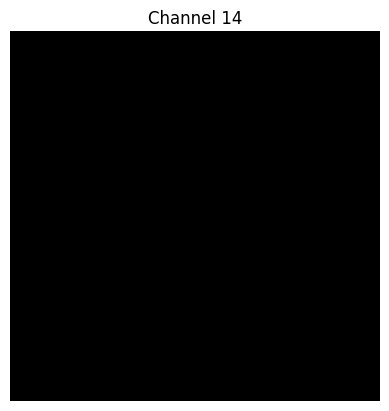

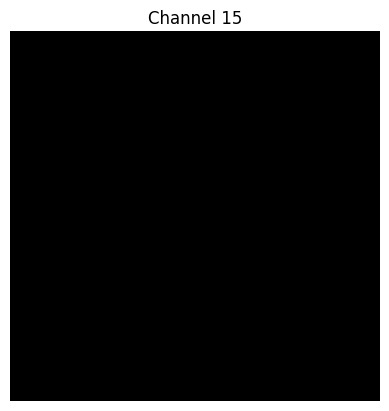

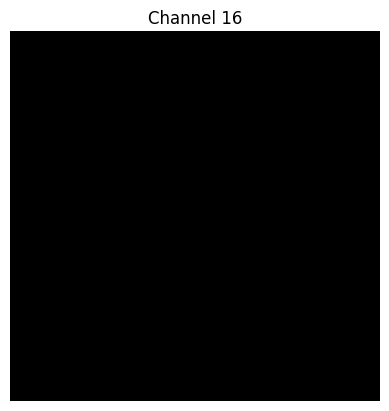

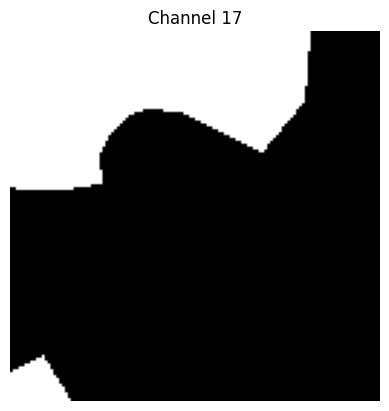

In [29]:
for i in range(k.shape[0]):  
    mask = k[i].cpu().numpy()  
    plt.imshow(mask, cmap='gray')
    plt.title(f'Channel {i+1}')
    plt.axis('off')
    plt.show()